In [112]:
#importamos las librerias que creemos que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn

In [113]:
#creamos el dataframe
students = pd.read_csv('StudentsPerformance (1).csv')

In [114]:
#leemos el dataframe
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,NaN,standard,none,1.125000,72,74
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.375000,99,95
996,male,group C,high school,free/reduced,none,0.968750,55,55
997,female,group C,high school,free/reduced,completed,0.921875,71,65
998,female,group D,some college,standard,completed,1.062500,78,77


In [115]:
#chequear si hay datos faltantes
students.isna().sum()

gender                          0
race/ethnicity                 11
parental level of education    10
lunch                           5
test preparation course        15
math score                      0
reading score                   0
writing score                   0
dtype: int64

In [116]:
#chequear cuánto(%) representan esos valores que faltan
students.isna().sum()/students.shape[0] * 100

gender                         0.0
race/ethnicity                 1.1
parental level of education    1.0
lunch                          0.5
test preparation course        1.5
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [117]:
#creo otro dataframe para eliminar los valores faltantes
students_drop = students.dropna()

In [118]:
students_drop.shape #para saber cuanto mide ahora

(959, 8)

In [119]:
#verificar si hay alguna fila/columna que tenga todos los valores faltantes
students.dropna(how='all') 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,NaN,standard,none,1.125000,72,74
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.375000,99,95
996,male,group C,high school,free/reduced,none,0.968750,55,55
997,female,group C,high school,free/reduced,completed,0.921875,71,65
998,female,group D,some college,standard,completed,1.062500,78,77


In [120]:
#hago una prueba para saber como quedaría el dataframe si elimino esos valores, no lo modifique aún.
students.dropna(subset=['race/ethnicity']) 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,NaN,standard,none,1.125000,72,74
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,1.375000,99,95
996,male,group C,high school,free/reduced,none,0.968750,55,55
997,female,group C,high school,free/reduced,completed,0.921875,71,65
998,female,group D,some college,standard,completed,1.062500,78,77


In [121]:
 #aca si estoy modificando el dataframe
students.dropna(subset=['race/ethnicity', 'parental level of education'], inplace=True)

In [122]:
#traer metodos de las librerias para la imputación de datos
from sklearn.impute import SimpleImputer

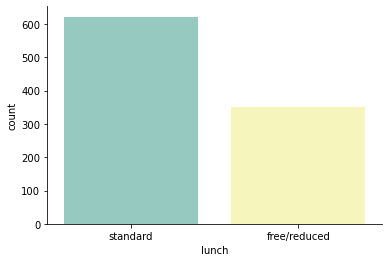

In [123]:
#graficar la variable lunch para analizar
sns.countplot(x="lunch", data=students, palette="Set3")
sns.despine()

In [124]:
#visualizar también en números
students['lunch'].value_counts()

standard        622
free/reduced    352
Name: lunch, dtype: int64

In [125]:
#instanciar la clase de SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [126]:
#aplicando el metodo para rellenar los espacios en blanco con el valor mas frecuente
lunch_imputados = imputer.fit_transform(students[['lunch']])

In [127]:
np.shape(lunch_imputados)

(979, 1)

In [128]:
#modificamos la variable original del dataframe
students['lunch'] = lunch_imputados

In [129]:
#chequeamos que se hayan modificado los valores
students['lunch'].value_counts()

standard        627
free/reduced    352
Name: lunch, dtype: int64

In [130]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
1,female,group C,some college,standard,completed,1.078125,90,88
2,female,group B,master's degree,standard,none,1.406250,95,93
3,male,group A,associate's degree,free/reduced,none,0.734375,57,44
4,male,group C,some college,standard,none,1.187500,78,75
5,female,group B,associate's degree,standard,none,1.109375,83,78


In [131]:
students['test preparation course'].value_counts()

none         621
completed    343
Name: test preparation course, dtype: int64

In [132]:
#Reemplazar datos faltantes por una constante
imputer_cursos = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='none')

In [133]:
students['test preparation course'] = imputer_cursos.fit_transform(students[['test preparation course']])

In [134]:
students['test preparation course'].value_counts()

none         636
completed    343
Name: test preparation course, dtype: int64

In [135]:
#chequeamos que no haya quedado ningún dato faltante
students.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

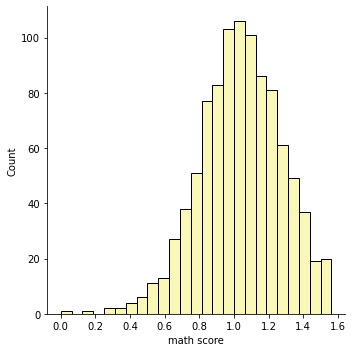

In [136]:
#detección de outliners
sns.displot(students['math score'], color='#F7F6A1')

C:\Users\Sol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


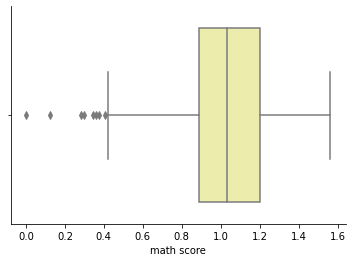

In [137]:
#grafico de cajas para visualizar mejor
sns.boxplot(students['math score'], color='#F7F6A1')
sns.despine()

In [138]:
#creo la variable z para crear un array de np sobre math score
z = stats.zscore(np.array(students['math score']))


In [139]:
#crear el umbral
thresold = 2.5

In [140]:
#chequeo si hay outliners y si los hay le cambia el indice
z_index = students['math score'][np.abs(z) < thresold].index
students = students.loc[z_index]

C:\Users\Sol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


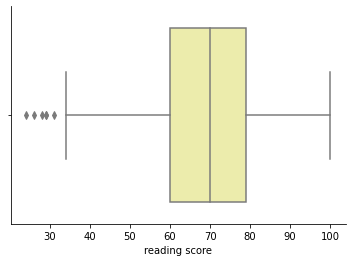

In [141]:
#realizamos el mismo analisis pero sobre reading score
sns.boxplot(students['reading score'], color='#F7F6A1')
sns.despine()

In [142]:
#en este caso vamos a trabajar con cuartiles
q1 = students['reading score'].quantile(0.25) #primer cuartil
q3 = students['reading score'].quantile(0.75) #tercer cuartil

In [143]:
#rangos intercuartiles
iqr = q3 - q1
#limite inferior
lb = q1 - (iqr * 1.5)
#limite superior
ub = q3 + (iqr * 1.5)

In [144]:
#chequeamos que los valores esten entre los límites
students = students[(students['reading score'] > lb) & (students['reading score'] < ub)]   

In [145]:
#modificamos el df en base al rango intercuartil
students.reset_index(drop=True, inplace=True)  

In [146]:
#En ningún caso modificamos los datos, solamente se modificaron los indices

In [147]:
#creamos una nueva columna que se calcula en base a otras dos columnas
students['english score'] = (students['writing score'] + students['reading score']) / 2

In [148]:
#transformación de variables categoricas a numericas
students['test preparation course'] = students['test preparation course'].apply(lambda x: 0 if x == 'none' else 1)

In [149]:
#creamos 2 columnas nuevas para desglozar gender en 2 variables numericas
students[['female', 'male']] = pd.get_dummies(students['gender'])

In [150]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,english score,female,male
0,female,group C,some college,standard,1,1.078125,90,88,89.0,1,0
1,female,group B,master's degree,standard,0,1.406250,95,93,94.0,1,0
2,male,group A,associate's degree,free/reduced,0,0.734375,57,44,50.5,0,1
3,male,group C,some college,standard,0,1.187500,78,75,76.5,0,1
4,female,group B,associate's degree,standard,0,1.109375,83,78,80.5,1,0


In [151]:
from sklearn.preprocessing import LabelEncoder

In [152]:
#instanciamos la clase LabelEncoder 
test_encoder = LabelEncoder()

In [153]:
#aplicamos el metodo fit_transform a la columna race/ethnicity
students.loc[:, 'race/ethnicity'] = test_encoder.fit_transform(students['race/ethnicity'])

In [154]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,english score,female,male
0,female,2,some college,standard,1,1.078125,90,88,89.0,1,0
1,female,1,master's degree,standard,0,1.406250,95,93,94.0,1,0
2,male,0,associate's degree,free/reduced,0,0.734375,57,44,50.5,0,1
3,male,2,some college,standard,0,1.187500,78,75,76.5,0,1
4,female,1,associate's degree,standard,0,1.109375,83,78,80.5,1,0


In [155]:
from sklearn.preprocessing import OneHotEncoder

In [156]:
#instanciamos la clase OneHotEncoder
parental_encoder = OneHotEncoder()

In [157]:
#aplicamos el metodo fit_transform para transformar la categoria en arreglos con valores booleanos
parental_encoder.fit_transform(students[['parental level of education']]).toarray()

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [158]:
#lo paso a lista
niveles = parental_encoder.categories_[0].tolist()

In [159]:
#creo las nuevas columnas
one_hot_students = pd.DataFrame(parental_encoder.fit_transform(students[['parental level of education']]).toarray(), columns=niveles)

In [160]:
#concateno al df las nuevas columnas
students = pd.concat([students, one_hot_students], axis = 1)

In [161]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,female,2,some college,standard,1,1.078125,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
1,female,1,master's degree,standard,0,1.406250,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
2,male,0,associate's degree,free/reduced,0,0.734375,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,male,2,some college,standard,0,1.187500,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,female,1,associate's degree,standard,0,1.109375,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0


In [162]:
from sklearn.preprocessing import LabelBinarizer

In [163]:
#instancio la clase LabelBinarizer
lb_lunch = LabelBinarizer()

In [164]:
#aplicamos fit_transform para reemplazar por 0 y 1
students['lunch'] = lb_lunch.fit_transform(students['lunch'])

In [165]:
students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,female,2,some college,1,1,1.078125,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
1,female,1,master's degree,1,0,1.406250,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
2,male,0,associate's degree,0,0,0.734375,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,male,2,some college,1,0,1.187500,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,female,1,associate's degree,1,0,1.109375,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0


In [166]:
#elimino las columnas que ya no son necesarias 
students.drop(['gender', 'parental level of education'], axis=1, inplace=True)

In [167]:
students.head()

,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,2,1,1,1.078125,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,1.406250,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0.734375,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0
3,2,1,0,1.187500,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0,1.109375,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0


In [168]:
#binning, para convertir lo numerico en categorias y poder vizualizarlo.
bins_score = [0, 60, 70, 80, 90, 100]
score_categories = pd.cut(students['reading score'], bins=bins_score,
                         labels=['desaprobado', 'regular', 'bien', 'muy bien', 'excelente'])

C:\Users\Sol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reading score', ylabel='count'>

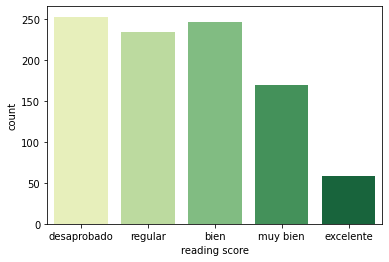

In [169]:
sns.countplot(score_categories, palette='YlGn')

In [170]:
#otra forma de vizualización con manera númerica
from sklearn.preprocessing import KBinsDiscretizer

In [171]:
kbins = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')

In [172]:
bins = kbins.fit_transform(students[['reading score']]).flatten()

In [173]:
bins[:10]

array([5., 5., 1., 4., 4., 5., 0., 2., 1., 0.])

C:\Users\Sol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


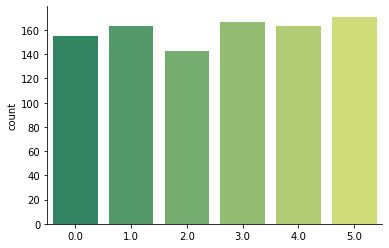

In [174]:
sns.countplot(bins, palette='summer')
sns.despine()

In [175]:
#Estandarización de datos
from sklearn.preprocessing import MinMaxScaler

In [176]:
scaler = MinMaxScaler(feature_range=(0, 100), copy=True)

In [177]:
#transformando los datos entre 0 y 100
students['math score'] = scaler.fit_transform(students[['math score']])

In [178]:
students['math score'].describe()

count    962.000000
mean      53.147785
std       20.001309
min        0.000000
25%       39.436620
50%       52.112676
75%       67.605634
max      100.000000
Name: math score, dtype: float64

In [181]:
#generar un archivo nuevo
students.to_csv()

",race/ethnicity,lunch,test preparation course,math score,reading score,writing score,english score,female,male,associate's degree,bachelor's degree,high school,master's degree,some college,some high school\r\n0,2,1,1,56.33802816901407,90,88,89.0,1,0,0.0,0.0,0.0,0.0,1.0,0.0\r\n1,1,1,0,85.91549295774647,95,93,94.0,1,0,0.0,0.0,0.0,1.0,0.0,0.0\r\n2,0,0,0,25.352112676056343,57,44,50.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0\r\n3,2,1,0,66.19718309859155,78,75,76.5,0,1,0.0,0.0,0.0,0.0,1.0,0.0\r\n4,1,1,0,59.15492957746479,83,78,80.5,1,0,1.0,0.0,0.0,0.0,0.0,0.0\r\n5,1,1,1,83.09859154929578,95,92,93.5,1,0,0.0,0.0,0.0,0.0,1.0,0.0\r\n6,1,0,0,15.492957746478872,43,39,41.0,0,1,0.0,0.0,0.0,0.0,1.0,0.0\r\n7,3,0,1,49.29577464788732,64,67,65.5,0,1,0.0,0.0,1.0,0.0,0.0,0.0\r\n8,1,0,0,12.676056338028168,60,50,55.0,1,0,0.0,0.0,1.0,0.0,0.0,0.0\r\n9,2,1,0,40.84507042253521,54,52,53.0,0,1,1.0,0.0,0.0,0.0,0.0,0.0\r\n10,3,1,0,15.492957746478872,52,43,47.5,0,1,1.0,0.0,0.0,0.0,0.0,0.0\r\n11,1,1,0,50.704225352112665,81,73,77.

In [183]:
#para descargar el archivo nuevo
from IPython.display import FileLink

students.to_csv('estudiantes.csv', index=False)

FileLink('estudiantes.csv')

C:\Users\Sol\Python Datos\estudiantes.csv

In [ ]:
#estimar cual podria ser la nota mas alta de los estudiantes, o estimar si un estudiante podria aprobar o no.